In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# 5번만에 10번만 출력되라 이런것들이 있다.
from tensorflow.python.keras.callbacks import LambdaCallback
# 에포크 돌때 3000번 다 돌리지말고 너가 어느정도 학습했으면 그만두어라
# 빠져나올때 방법은 되게 많다.
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import LeakyReLU

In [2]:
def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

In [3]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[0]])

1. Hidden Layer 5개

In [4]:
model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
activation (Activation)      (None, 5)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


#### 15는 어디서 나왔나?
5*2(hidden unit 5개 * x,y값) +5(bias)

In [5]:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
activation (Activation)      (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 손실함수 : 가능한 작게 해야한다. 최적화함수 : adam을 쓰면 된다.
model.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
# batch size : 경사하강법을 사용할 때 사용하는 데이터 단위
# 에포크 : 전체데이터를 한번 사용하는 것이 1에포크라고 한다.
model.fit(X, y, batch_size=4, epochs=2000, verbose=0)
print(model.predict(X))

[[0.16680846]
 [0.7485638 ]
 [0.75705767]
 [0.3056417 ]]


In [8]:
p = model.predict(X)
print(p > 0.5)
print((p > 0.5)*1) #numpy 객체이기에 가능

[[False]
 [ True]
 [ True]
 [False]]
[[0]
 [1]
 [1]
 [0]]


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

1. Hidden Layer 5개

In [9]:
model = Sequential()
model.add(Dense(3, input_dim=2))
model.add(Activation('sigmoid'))
model.summary()

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X, y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(X))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
______________________________________

In [10]:
model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Activation('sigmoid'))
model.summary()

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X, y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(X))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
______________________________________

#### 어느정도 학습을 시켜야할것인가?
-> 그래프로 확인하자

(2500, 2)
[[0.   0.  ]
 [0.   0.02]
 [0.   0.04]
 ...
 [0.98 0.94]
 [0.98 0.96]
 [0.98 0.98]]
<class 'numpy.ndarray'>
(2500, 1)


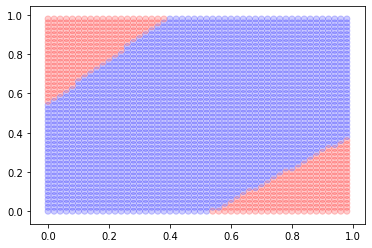

In [11]:
#mash grid 0.02로 잘라버리는
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
# flatten은 2차원을 1차원으로 피는 것을 말한다.
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
print(grid)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
____________________________________

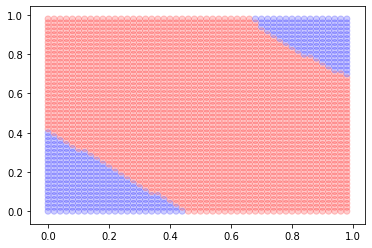

In [12]:
model = Sequential()
model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))
model.summary()

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X, y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(X))

xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


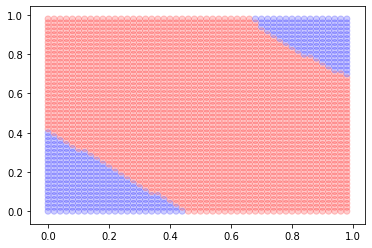

In [13]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

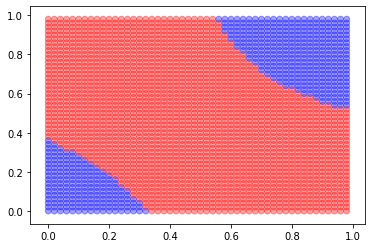

In [14]:
model = Sequential()
model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

# 이전층의 output을 나의 input으로 보겠다. 이것이 sequential 모델이다, 이것이 아니면 연결을 해줘야.
model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X, y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(X))

xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

(100, 2)
[[0.  0. ]
 [0.  0.1]
 [0.  0.2]
 [0.  0.3]
 [0.  0.4]
 [0.  0.5]
 [0.  0.6]
 [0.  0.7]
 [0.  0.8]
 [0.  0.9]
 [0.1 0. ]
 [0.1 0.1]
 [0.1 0.2]
 [0.1 0.3]
 [0.1 0.4]
 [0.1 0.5]
 [0.1 0.6]
 [0.1 0.7]
 [0.1 0.8]
 [0.1 0.9]
 [0.2 0. ]
 [0.2 0.1]
 [0.2 0.2]
 [0.2 0.3]
 [0.2 0.4]
 [0.2 0.5]
 [0.2 0.6]
 [0.2 0.7]
 [0.2 0.8]
 [0.2 0.9]
 [0.3 0. ]
 [0.3 0.1]
 [0.3 0.2]
 [0.3 0.3]
 [0.3 0.4]
 [0.3 0.5]
 [0.3 0.6]
 [0.3 0.7]
 [0.3 0.8]
 [0.3 0.9]
 [0.4 0. ]
 [0.4 0.1]
 [0.4 0.2]
 [0.4 0.3]
 [0.4 0.4]
 [0.4 0.5]
 [0.4 0.6]
 [0.4 0.7]
 [0.4 0.8]
 [0.4 0.9]
 [0.5 0. ]
 [0.5 0.1]
 [0.5 0.2]
 [0.5 0.3]
 [0.5 0.4]
 [0.5 0.5]
 [0.5 0.6]
 [0.5 0.7]
 [0.5 0.8]
 [0.5 0.9]
 [0.6 0. ]
 [0.6 0.1]
 [0.6 0.2]
 [0.6 0.3]
 [0.6 0.4]
 [0.6 0.5]
 [0.6 0.6]
 [0.6 0.7]
 [0.6 0.8]
 [0.6 0.9]
 [0.7 0. ]
 [0.7 0.1]
 [0.7 0.2]
 [0.7 0.3]
 [0.7 0.4]
 [0.7 0.5]
 [0.7 0.6]
 [0.7 0.7]
 [0.7 0.8]
 [0.7 0.9]
 [0.8 0. ]
 [0.8 0.1]
 [0.8 0.2]
 [0.8 0.3]
 [0.8 0.4]
 [0.8 0.5]
 [0.8 0.6]
 [0.8 0.7]
 [0.8 0.8]
 [0.8 0.9]
 

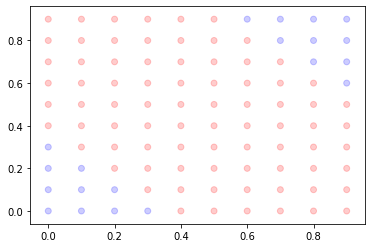

In [15]:
#mash grid 0.02로 잘라버리는
xx, yy = np.mgrid[0:1:0.1, 0:1:0.1]
# flatten은 2차원을 1차원으로 피는 것을 말한다.
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
print(grid)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

(10000, 2)
[[0.   0.  ]
 [0.   0.01]
 [0.   0.02]
 ...
 [0.99 0.97]
 [0.99 0.98]
 [0.99 0.99]]
<class 'numpy.ndarray'>
(10000, 1)


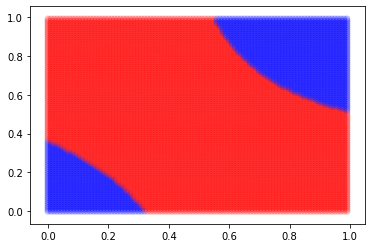

In [16]:
#mash grid 0.02로 잘라버리는
xx, yy = np.mgrid[0:1:0.01, 0:1:0.01]
# flatten은 2차원을 1차원으로 피는 것을 말한다.
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
print(grid)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

#### 그래프가 2차원만 된다는 단점이 있다. 다차원은 어렵다.

<strong>층을 너무 많이 만들면 오히려 겨과가 더 나빠질 확률이 더 커진다.<br>
       이를 어떻게 돌파할 수 있을까?
    1층짜리 건물을 짓는 것과, 10층짜리 건물을 짓는것처럼 생각하면 된다.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

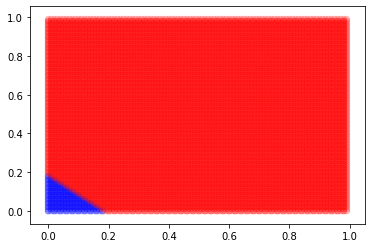

In [17]:
model = Sequential()
model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

# 이전층의 output을 나의 input으로 보겠다. 이것이 sequential 모델이다, 이것이 아니면 연결을 해줘야.
model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))

model.add(Dense(10, input_dim=2)) # 뉴런수
model.add(Activation('sigmoid'))


model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X, y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(X))

xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

xx, yy = np.mgrid[0:1:0.01, 0:1:0.01]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

(500,)


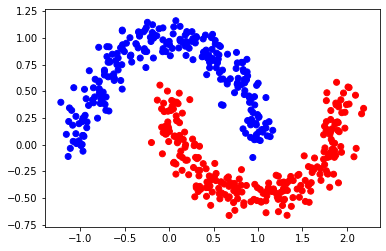

In [18]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.1)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

(500,)


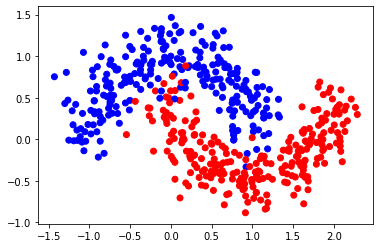

In [19]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.2)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

(500,)


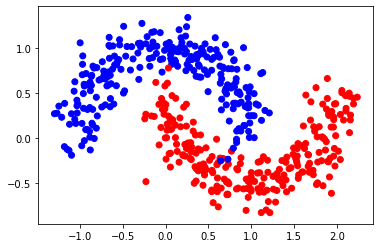

In [20]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

(500,)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
[[0.69203883]
 [0.01630041]
 [0.8797526 ]
 [0.03617942]]


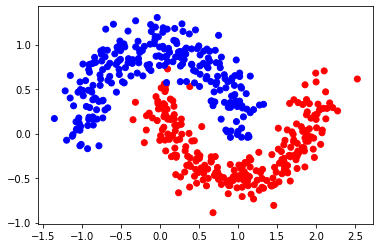

In [21]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data))
print(model.predict(X))

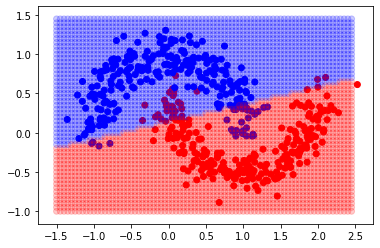

In [22]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

(500,)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_31 (Dense)             (None, 1)         

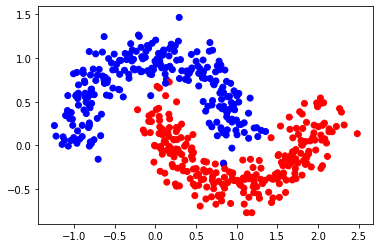

In [23]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data))
print(model.predict(X))

In [ ]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [ ]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

xx, yy = np.mgrid[0:1:0.01, 0:1:0.01]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('moon.png')

In [ ]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

In [ ]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

#verbose가 1이면 로그를 보는 것이다.
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=1,
          validation_data=(x_data, y_data))
print(model.predict(X))

In [ ]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [ ]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

#verbose가 1이면 로그를 보는 것이다.
#callback 할때는 verbose는 0이다.
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data),
         callbacks = [printepoch(500)])
print(model.predict(X))

In [ ]:
# loss는 에러률을 말한다.

#### accuracy를 추가

In [ ]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#verbose가 1이면 로그를 보는 것이다.
#callback 할때는 verbose는 0이다.
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data),
         callbacks = [printepoch(300)])
print(model.predict(X))

In [ ]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

#### LeakyLELU 사용!!

#### 시그모이드 쓰면 아주 오래걸린다. CNN 때 쓰면 안된다.
층이 깊어지면 시그모이드는 될때도 안될때도 있지만 LeakyRelu는 아니다?

(500,)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_24 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________

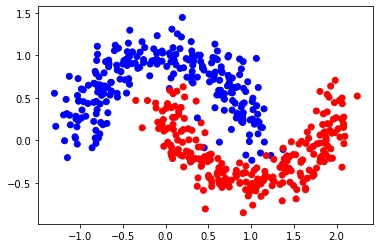

In [20]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

model = Sequential([
    Dense(5, activation=LeakyReLU(alpha=0.1),input_dim=2),   
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

0 => {'loss': 0.7157647609710693, 'acc': 0.496, 'val_loss': 0.7097498655319214, 'val_acc': 0.492}
300 => {'loss': 0.03145961537957191, 'acc': 0.986, 'val_loss': 0.030512527748942374, 'val_acc': 0.986}
600 => {'loss': 0.024734640680253505, 'acc': 0.984, 'val_loss': 0.023643054813146592, 'val_acc': 0.986}
900 => {'loss': 0.02233929056674242, 'acc': 0.986, 'val_loss': 0.021984622254967688, 'val_acc': 0.986}
1200 => {'loss': 0.02140729036182165, 'acc': 0.986, 'val_loss': 0.02104838117957115, 'val_acc': 0.986}
1500 => {'loss': 0.020787256117910147, 'acc': 0.988, 'val_loss': 0.02045134217478335, 'val_acc': 0.986}
1800 => {'loss': 0.020592825952917337, 'acc': 0.99, 'val_loss': 0.020099361799657343, 'val_acc': 0.992}
2100 => {'loss': 0.021055538021028043, 'acc': 0.992, 'val_loss': 0.020036782138049603, 'val_acc': 0.992}
2400 => {'loss': 0.0204454786144197, 'acc': 0.99, 'val_loss': 0.019450007379055022, 'val_acc': 0.992}
2700 => {'loss': 0.021036184532567857, 'acc': 0.988, 'val_loss': 0.0193283

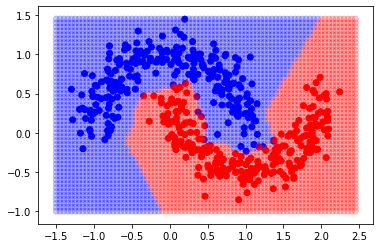

In [21]:
#verbose가 1이면 로그를 보는 것이다.
#callback 할때는 verbose는 0이다.
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data),
         callbacks = [printepoch(300)])
print(model.predict(X))

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [22]:
# 리키렐루 사용으로 학습이 안되는 경우가 거의 없다. 

(500,)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 10)        

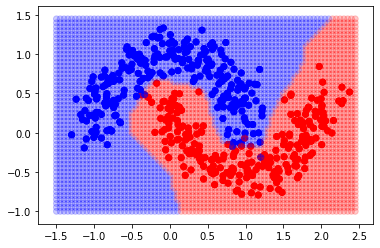

In [23]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

model = Sequential([
    Dense(5, activation=LeakyReLU(alpha=0.1),input_dim=2),   
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#verbose가 1이면 로그를 보는 것이다.
#callback 할때는 verbose는 0이다.
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data),
         callbacks = [printepoch(300)])
print(model.predict(X))

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [24]:
# 리키렐루는 500번만해도 충분하다, 따라서 굳이 더할 필요가 없다.
# 리키렐루 하나때문에 인공지능의 봄을 다시 맞게된 이유!! 10년만에 찾았다. 논문이 엄청 나왔다.

In [25]:
def createModel(layers, activation, input_dim) :    
    model = Sequential()        
    d = layers.pop(0)
    model.add(Dense(d, activation=activation,input_dim =input_dim))
    for l in layers :
        model.add(Dense(l, activation=activation))
    # 여기서는 렐루 쓰면 안됨 (마지막?)
    model.add(Dense(1, activation='sigmoid'))    
    return model

    
model = createModel([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5], LeakyReLU(alpha=0.1), 2) 